In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1= pd.read_excel('Airlines+Data.xlsx',parse_dates=True,index_col=0)
data1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [3]:
data1.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [4]:
data=data1.copy()

In [5]:
#upsampling to daily intervals
upsampled= data.resample('D').mean()
print(upsampled.head(50))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0
1995-02-02         NaN
1995-02-03         NaN
1995-02-04         NaN
1995-02-05         NaN
1995-02-06         NaN
1995-02-07         NaN
1995-02-08         NaN
1995-02-09         NaN
1995-02-10         NaN
1995-02-11 

# interpolate the missing value

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935


Text(0.5, 1.0, 'Monthly Distribution of Passengers data')

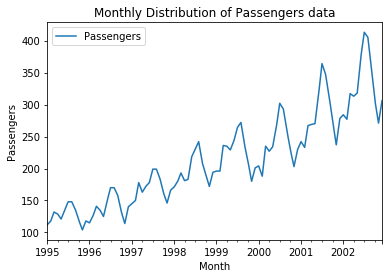

In [6]:
 interpolated = upsampled.interpolate(method='linear')
 print(interpolated.head(10))
 interpolated.plot()
 plt.ylabel("Passengers")
 plt.title("Monthly Distribution of Passengers data")

# Square root transfermation

In [7]:
from numpy import sqrt

In [8]:
airline=pd.DataFrame(data.values)
airline

,0
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


In [9]:
airline.columns=['passengers']
airline['passengers']=sqrt(airline['passengers'])

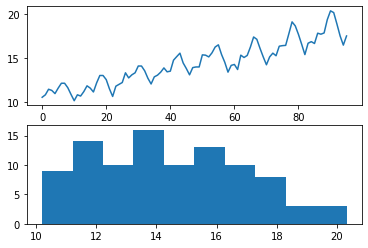

In [10]:
#line plot
plt.subplot(211)
plt.plot(airline['passengers'])
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])
plt.show()     

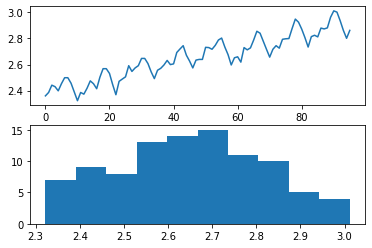

In [11]:
from numpy import log
airline['passengers']=log(airline['passengers'])
#line plot
plt.subplot(211)
plt.plot(airline['passengers'])
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])
plt.show() 

In [12]:
airline['6-month-SMA']=airline['passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['passengers'].rolling(window=12).mean()

In [13]:
airline.head(16)

,passengers,6-month-SMA,12-month-SMA
0,2.359249,NaN,NaN
1,2.385342,NaN,NaN
2,2.441401,NaN,NaN
3,2.429906,NaN,NaN
4,2.397895,NaN,NaN
5,2.452637,2.411072,NaN
6,2.498606,2.434298,NaN
7,2.498606,2.453175,NaN
8,2.456327,2.455663,NaN
9,2.389562,2.448939,NaN


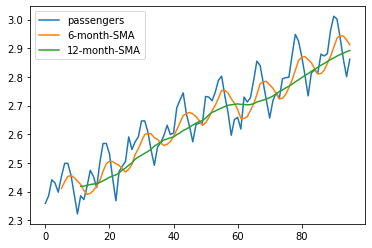

In [14]:
airline.plot()

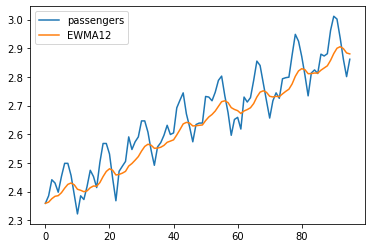

In [15]:
airline['EWMA12']=airline['passengers'].ewm(span=12,adjust=False).mean()
airline[['passengers','EWMA12']].plot()

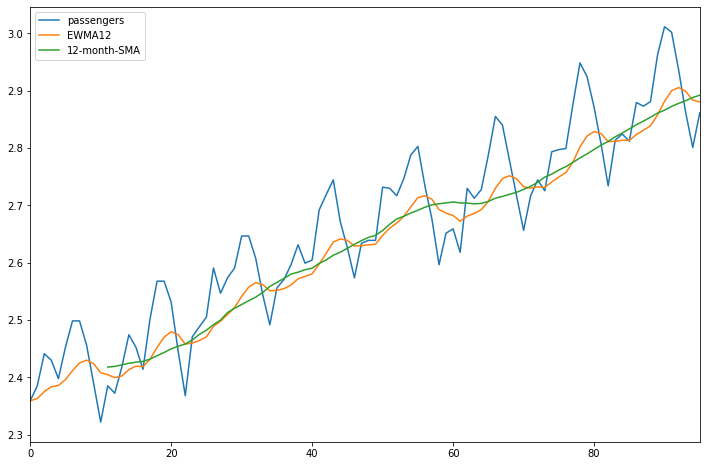

In [16]:
airline[['passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

In [17]:
train_data=data.iloc[0:83]
test_data=data.iloc[83:]
test_data

,Passengers
Month,
2001-12-01,278
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318
2002-06-01,374
2002-07-01,413
2002-08-01,405


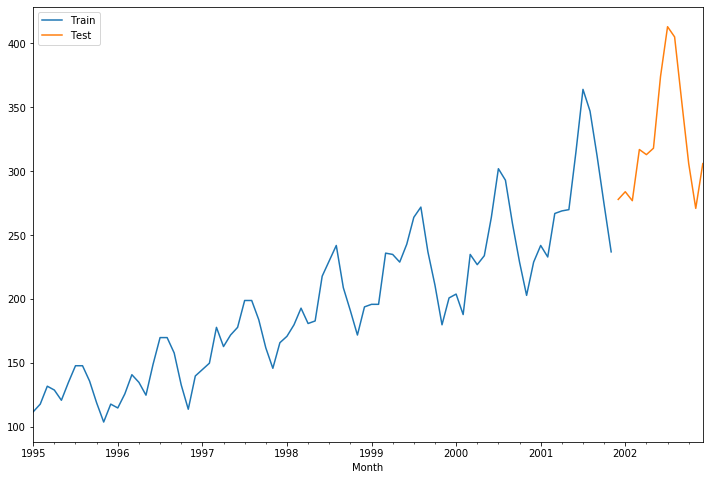

In [18]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8));

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model= ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model=model.fit()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [20]:
test_prediction=fitted_model.forecast(13)

In [21]:
test_prediction

2001-12-01    271.126442
2002-01-01    278.222449
2002-02-01    276.792473
2002-03-01    322.246629
2002-04-01    313.632465
2002-05-01    313.616405
2002-06-01    353.221337
2002-07-01    395.950942
2002-08-01    392.585962
2002-09-01    350.211792
2002-10-01    309.395289
2002-11-01    270.901852
2002-12-01    308.382495
Freq: MS, dtype: float64

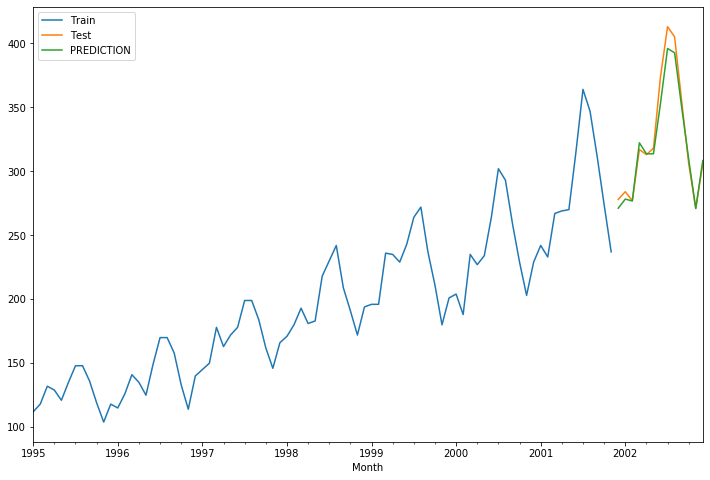

In [22]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION')

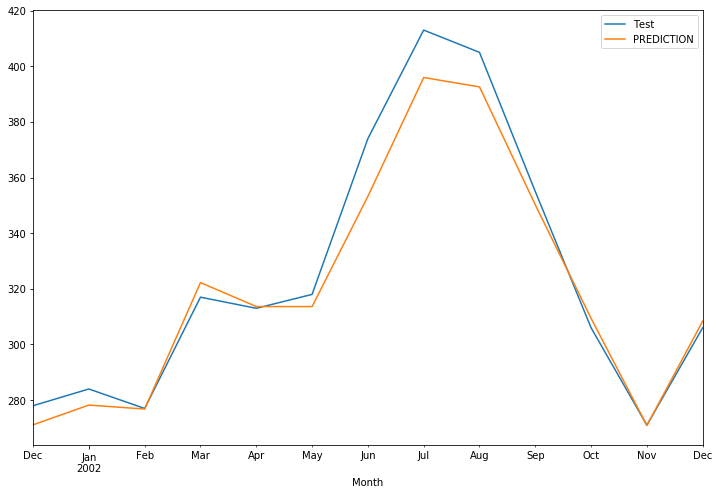

In [23]:
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION')

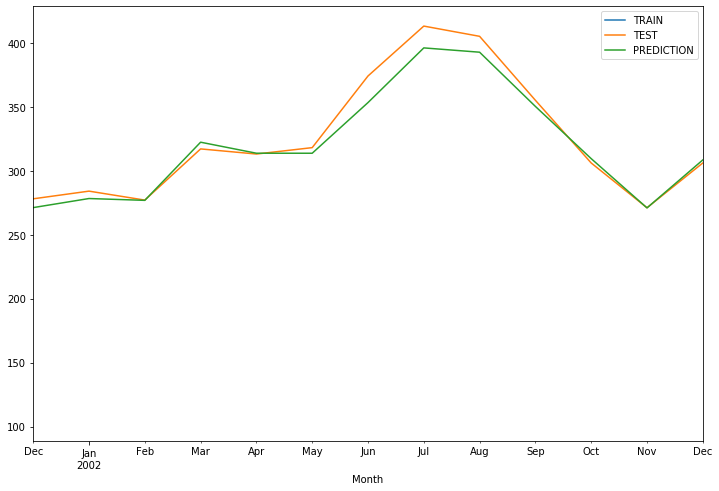

In [24]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION',xlim=['2001-12-01','2002-12-01']);

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(test_data,test_prediction)

80.34495114527651

In [27]:
np.sqrt(mean_squared_error(test_data,test_prediction))

8.963534523014708

In [28]:
test_data.describe()

,Passengers
count,13.000000
mean,324.384615
std,47.896657
min,271.000000
25%,284.000000
50%,313.000000
75%,355.000000
max,413.000000


In [29]:
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_prediction= final_model.forecast(36)

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


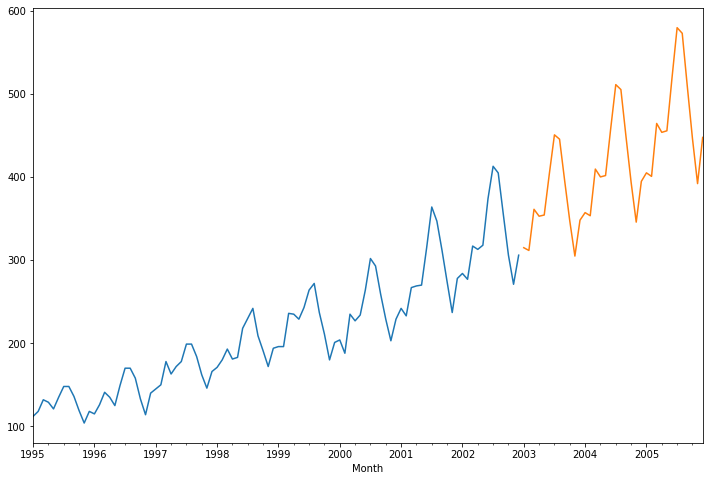

In [30]:
data['Passengers'].plot(figsize=(12,8))
forecast_prediction.plot()

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

data['EWMA12']=data['Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [32]:
model_ses12=SimpleExpSmoothing(data['Passengers'])
fittted_model=model_ses12.fit(smoothing_level=alpha,optimized=False)
data['SES12']= fitted_model.fittedvalues.shift(-1)
data

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,EWMA12,SES12
Month,,,
1995-01-01,112,112.000000,111.935505
1995-02-01,118,112.923077,134.953383
1995-03-01,132,115.857988,129.458405
1995-04-01,129,117.879836,129.150785
1995-05-01,121,118.359861,139.432549
...,...,...,...
2002-08-01,405,335.501047,NaN
2002-09-01,355,338.500886,NaN
2002-10-01,306,333.500749,NaN


In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(data['Passengers'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Passengers,EWMA12,SES12,DESadd12
Month,,,,
1995-01-01,112,112.000000,111.935505,114.042082
1995-02-01,118,112.923077,134.953383,120.042082
1995-03-01,132,115.857988,129.458405,134.042082
1995-04-01,129,117.879836,129.150785,131.042082
1995-05-01,121,118.359861,139.432549,123.042082
...,...,...,...,...
2002-08-01,405,335.501047,NaN,407.042082
2002-09-01,355,338.500886,NaN,357.042082
2002-10-01,306,333.500749,NaN,308.042082


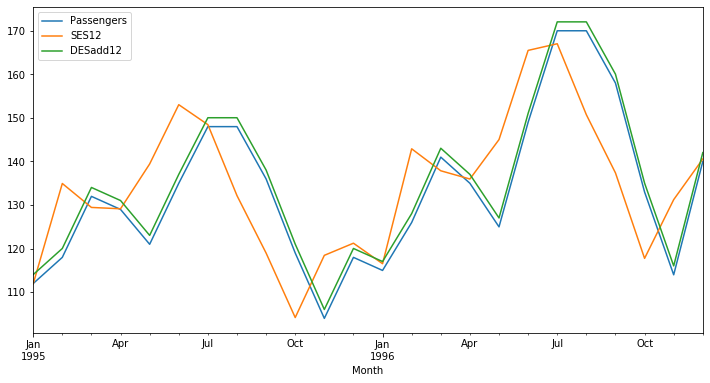

In [34]:
data[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [35]:
data['DESmul12'] = ExponentialSmoothing(data['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1995-01-01,112,112.000000,111.935505,114.042082,112.343374
1995-02-01,118,112.923077,134.953383,120.042082,118.361769
1995-03-01,132,115.857988,129.458405,134.042082,132.404691
1995-04-01,129,117.879836,129.150785,131.042082,129.395493
1995-05-01,121,118.359861,139.432549,123.042082,121.370967


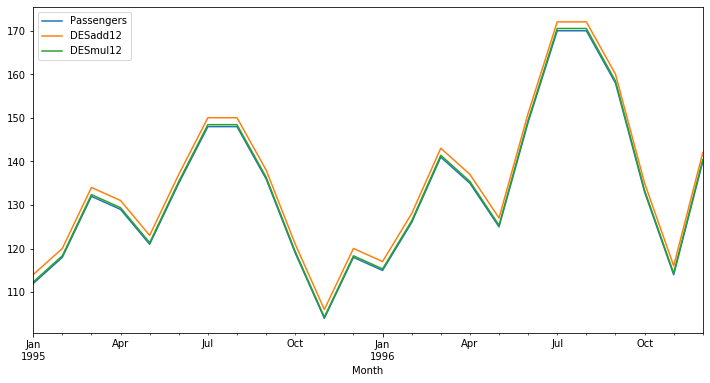

In [36]:
data[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [37]:
data['TESadd12'] = ExponentialSmoothing(data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1995-01-01,112,112.000000,111.935505,114.042082,112.343374,113.112576
1995-02-01,118,112.923077,134.953383,120.042082,118.361769,120.484249
1995-03-01,132,115.857988,129.458405,134.042082,132.404691,135.402337
1995-04-01,129,117.879836,129.150785,131.042082,129.395493,132.997233
1995-05-01,121,118.359861,139.432549,123.042082,121.370967,125.458905


In [38]:
data['TESmul12'] = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1995-01-01,112,112.000000,111.935505,114.042082,112.343374,113.112576,113.653096
1995-02-01,118,112.923077,134.953383,120.042082,118.361769,120.484249,111.329090
1995-03-01,132,115.857988,129.458405,134.042082,132.404691,135.402337,134.359769
1995-04-01,129,117.879836,129.150785,131.042082,129.395493,132.997233,129.669009
1995-05-01,121,118.359861,139.432549,123.042082,121.370967,125.458905,129.739189


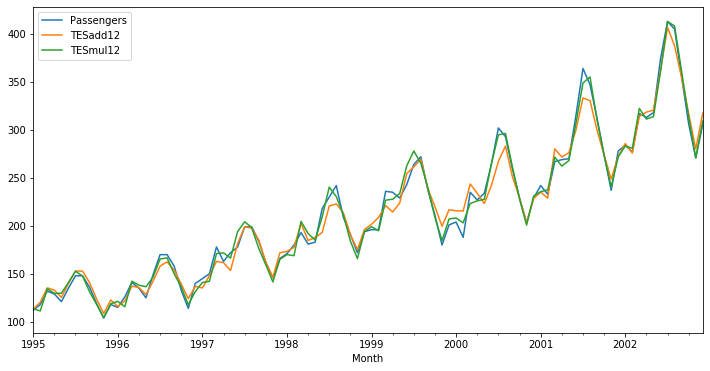

In [39]:
data[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

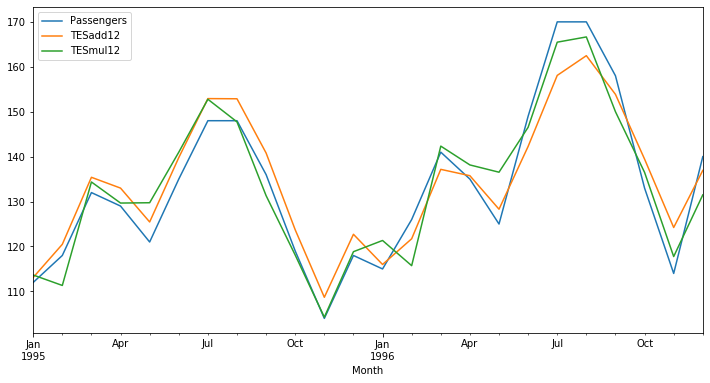

In [40]:
data[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [41]:
from statsmodels.tsa.ar_model import AR,ARResults
# Load the data
ar_models= AR(train_data['Passengers'])
ARfit=ar_models.fit(method='mle',ic='aic')

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [42]:
ARfit.params

const            2.845721
L1.Passengers    1.179806
L2.Passengers   -0.434338
L3.Passengers    0.174032
L4.Passengers   -0.289231
L5.Passengers    0.304466
L6.Passengers   -0.078442
L7.Passengers    0.066190
L8.Passengers   -0.361895
L9.Passengers    0.425184
dtype: float64

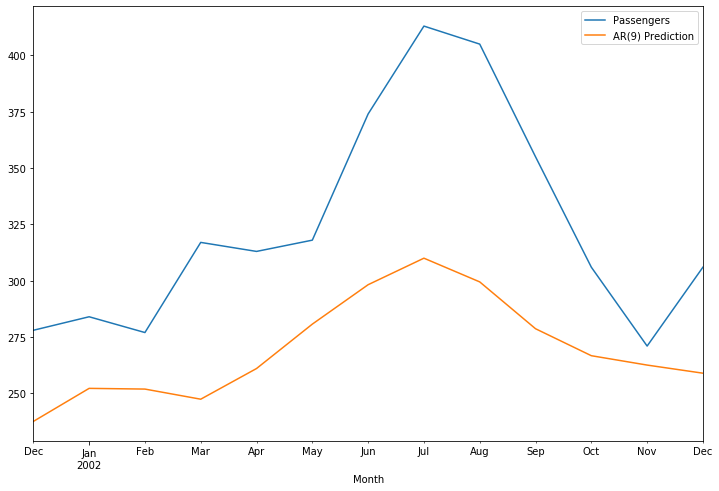

In [43]:
start=len(train_data)
end=len(data)-1
#predict test data
prediction9=ARfit.predict(start=start,end=end).rename('AR(9) Prediction')

#plot the test data and prediction data
test_data['Passengers'].plot(legend=True)
prediction9.plot(legend=True,figsize=(12,8))  

In [44]:
# ARIMA :
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Passengers, order=(1,1,1))
model_fit = model.fit(disp=0)

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [45]:
# Summary of model :
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.813
Method:                       css-mle   S.D. of innovations             21.536
Date:                Wed, 11 Aug 2021   AIC                            863.627
Time:                        09:56:40   BIC                            873.842
Sample:                    02-01-1995   HQIC                           867.755
                         - 12-01-2002                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2914      0.266      8.601      0.000       1.769       2.814
ar.L1.D.Passengers     0.7248      0.073      9.898      0.000       0.581       0.868
ma.L1.D.Passengers    -1.0000      0.028    -36.363      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3797           +0.0000j            1.3797            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
# Get Root-Mean-Squared-Error for ARIMA model :
import numpy as np
residual = pd.DataFrame(model_fit.resid)
rmse = np.mean(((residual)**2)**0.5)
rmse

0    16.950775
dtype: float64

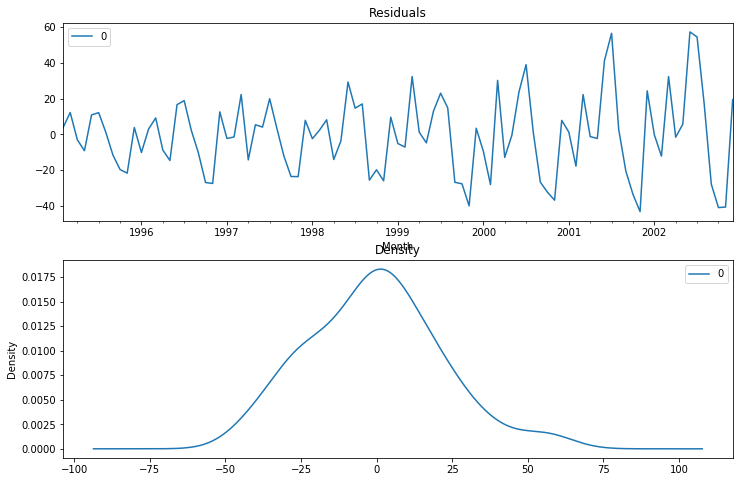

In [47]:
# Residual plot & Density of Residuals :
fig, ax = plt.subplots(2,1, figsize=(12,8))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

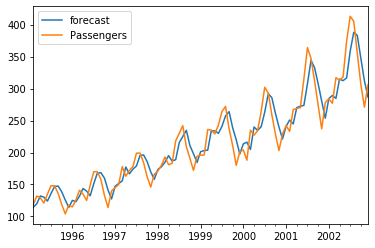

In [48]:
# prediction :
model_fit.plot_predict()
plt.show()

In [49]:
# split data :
train = data.Passengers[0:83]
test = data.Passengers[83:]

In [50]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [51]:
# forecast sales value :
forecast, se, conf = fitted.forecast(13, alpha=0.05)

In [52]:
# make series to form graph :
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

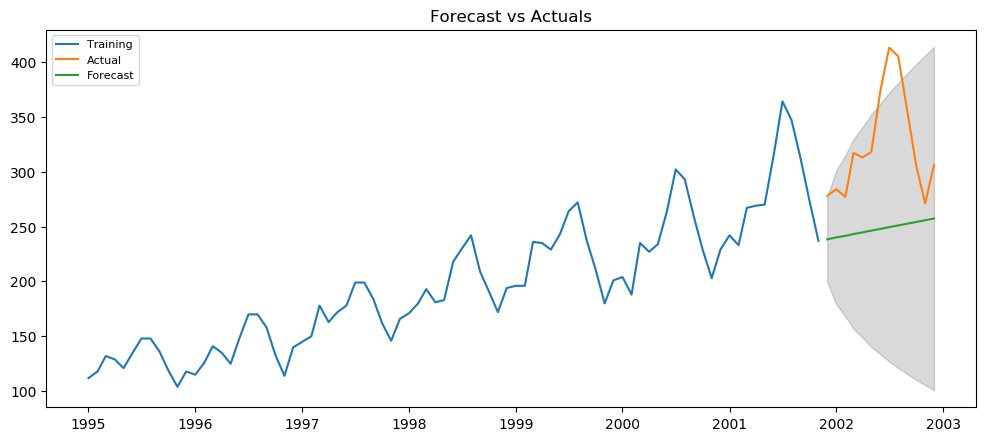

In [53]:
# Plot forecasting vs actual graph :
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [54]:
# get rmse and acf value for testing :
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # Root mean squared error
    acf1 = acf(forecast-test)                     # Auto correlation function
    return({ 'rmse':rmse, 'acf1':acf1 
            })

forecast_accuracy(forecast, test.values)

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'rmse': 88.64116837563162,
 'acf1': array([ 1.        ,  0.69551133,  0.16926316, -0.26823005, -0.43325385,
        -0.41369393, -0.33775002, -0.23381529, -0.08797975,  0.09368164,
         0.15541518,  0.12149123,  0.03936035])}

In [56]:
# SARIMA model :
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data["Passengers"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -307.047
Date:                              Wed, 11 Aug 2021   AIC                            620.094
Time:                                      10:04:21   BIC                            627.350
Sample:                                  01-01-1995   HQIC                           623.009
                                       - 12-01-2002                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1455      0.446     -0.327      0.744      -1.019       0.728
ma.S.L12      -0.12

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [57]:
sarima_rmse = np.mean(((results.resid)**2)**0.5)
sarima_rmse

9.536128175707772

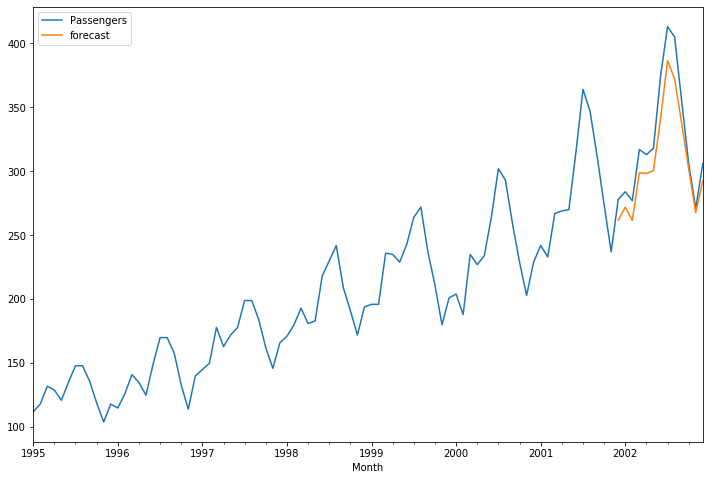

In [58]:
data['forecast'] = results.predict(start = 83, end=96 , dynamic= True)  
data[['Passengers', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [ ]:
# Therefor, after calculating rmse for different models we can conclude that SARIMA model performing on whole
# Passengers value gives us lesser rmse is good model compare to model with ARIMA model with -1 dispersion and applying on training data.
# ans rmse from ARIMA model with 0 dispersion on whole Passengers data gives higher rmse compare to SARIMA.

# Therefor, SARIMA model is good compare to others.